# Sentiment Analysis of Fake News


#### STEP 1 : Importing python libraries


In [429]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from watson_developer_cloud import ToneAnalyzerV3 # pip install --upgrade "watson-developer-cloud>=2.1.0"

%matplotlib inline

print ("--> libraries loaded.")

--> libraries loaded.


#### STEP 2 : Initial setup

In [394]:
sns.set(color_codes=True)

tone_analyzer = ToneAnalyzerV3(
                    username = "404c0d53-3afa-4c6a-8029-9abda9feb22f",
                    password = "MTOG8sOMMPm4",
                    version='2017-09-21')

columns = ['id', 'Anger', 'Fear', 'Joy', 'Sadness', 'Analytical', 'Confident', 'Tentative']
output = pd.DataFrame(columns=columns)

dataset_path = "/home/robomex/dataset/dataset_9/"

print ("--> variables initialized.")

class Dataset(object):
    def __init__(self, name, pd):
        self.name = name
        self.pd = pd
        
        
dataset_objects = []
analysis_objects = []

def get_analyzed_dataframe(text, index):
    tone = tone_analyzer.tone(
                {'text': text},
                'application/json'
            ).get_result()

    d = {'id': [index], 'Anger': [0], 'Fear': [0], 'Joy': [0], 'Sadness': [0], 'Analytical': [0], 'Confident': [0],'Tentative': [0]}
    
    # add scores in a dictionary
    for i in tone['document_tone']['tones']:
        d[i['tone_name']] = [i['score']]

    return pd.DataFrame(d)

print('--> functions loaded.')

--> variables initialized.
--> functions loaded.


#### STEP 3 : Dataset loading

In [395]:
print("--> loading dataset...")
csv_files = glob.glob(dataset_path +"*.csv")
print(str(len(csv_files)) + " number of files found.")

for file in csv_files:
    dataset_objects.append(Dataset(str(file).replace(dataset_path,""), pd.DataFrame()))
    analysis_objects.append(Dataset(str(file).replace(dataset_path,""), pd.DataFrame()))

for obj in dataset_objects:
    obj.pd = pd.read_csv(file)
    obj.pd.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'id', 'Unnamed:17'], inplace=True)
    obj.pd.columns = dataset.columns.str.replace('scraped_at','articles')

print("--> dataset has been loaded.")

--> loading dataset...
12 number of files found.
--> dataset has been loaded.


#### STEP 3 : Sentiment Analysis using IBM Watson Tone Analyzer

In [396]:
print("--> Performing sentiment analysis of articles from each files...")

for (data, output) in zip(dataset_objects, analysis_objects):
    # fetch ten articles and find analysis score
    for i in range(1,11):
        output.pd = output.pd.append(get_analyzed_dataframe(data.pd.articles[i], i), sort=True)
    output.pd.reset_index()
    output
    
    print(str(data.name) + " file has been processed.")

print("--> analysis done.")

--> Performing sentiment analysis of articles from each files...
unreliable_mini.csv file has been processed.
junksci_mini.csv file has been processed.
fake_mini.csv file has been processed.
conspiracy_mini.csv file has been processed.
satire_mini.csv file has been processed.
political_mini.csv file has been processed.
hate_mini.csv file has been processed.
clickbait_mini.csv file has been processed.
reliable_mini.csv file has been processed.
unknown_mini.csv file has been processed.
rumor_mini.csv file has been processed.
bias_mini.csv file has been processed.
--> analysis done.


#### STEP 4 : Graph plotting

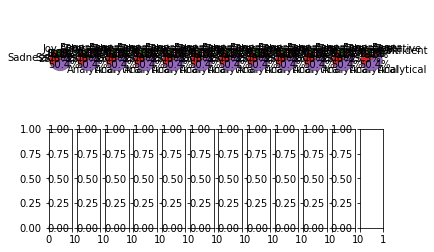

<Figure size 720x720 with 0 Axes>

In [418]:
print("--> plotting graph...")

for output in analysis_objects:
    labels = 'Anger', 'Fear', 'Joy', 'Sadness', 'Analytical', 'Confident', 'Tentative'
    output = output.pd
    sizes = [sum(output.Fear), sum(output.Anger), sum(output.Joy), sum(output.Sadness), sum(output.Analytical), sum(output.Confident), sum(output.Tentative)]

    ax.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("--> graph plotted.")

#### STEP 5 : Saving data

In [430]:
print("--> saving data...")
for data in analysis_objects:
    data.pd.to_csv(dataset_path + "analysis/"+ str(data.name).replace(".csv","") + "_analysis.csv")
    
print("--> data has been saved.")

--> saving data...
--> data has been saved.
